<a href="https://colab.research.google.com/github/angulorojasmariaclaudia-coder/SOLUCION-DE-PRACTICAS-DE-APRENDIZAJE-AUTOMATICO-I/blob/main/Soluci%C3%B3n_Pr%C3%A1ctica_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 5: CRITERIOS PARA LA SELECCIÓN Y EVALUACIÓN DE MODELOS**

*Objetivo: Aprender a utilizar los criterios para la elección del mejor algoritmo de clustering y la selección de los parametros óptimos*

In [1]:
#Importamos las librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform

Nota: Teniendo en cuenta que se esta trabajando en colab donde *pyclustertend* es incompatible con python 3.10, se implementara de forma manual las funciones para la solución de ejercicios en la práctica.

### **EJERCICIO N°1:**

Calcula el estadístico de Hopkins y muestra visualmente el VAT para algunos de los datasets de
https://scikit-learn.org/stable/api/sklearn.datasets.html y decide para qué datasets tiene
sentido hacer clustering y para cuáles no. El paquete pyclustertend solo funciona para versiones
de Python >=3.8, <3.10, por lo que puede que tengas que crear otro entorno de Anaconda con
una versión de Python válida.


```
DATASETS QUE SE VAN A CARGAR:

1. make_blobs: dataset con clusters claros
2. make_moons: dataset con estructura no lineal
3. make_circles: dataset concéntrico (difícil para K-means)
4. random: datos completamente aleatorios
```



In [2]:
#Función 1: HOPKINS
def hopkins_statistic(X, m=100):
    n, d = X.shape
    m = min(m, n)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    # Muestras reales
    idx = np.random.choice(n, m, replace=False)
    u_distances, _ = nbrs.kneighbors(X[idx], n_neighbors=2)
    u_distances = u_distances[:, 1]   # ignorar distancia 0 a sí mismo

    # Muestras aleatorias
    X_min, X_max = X.min(axis=0), X.max(axis=0)
    random_points = np.random.uniform(X_min, X_max, (m, d))
    w_distances, _ = nbrs.kneighbors(random_points)

    # Estadístico de Hopkins
    H = np.sum(w_distances) / (np.sum(w_distances) + np.sum(u_distances))
    return H

In [3]:
#Función 2: VAT
def vat(X):
    D = squareform(pdist(X))
    N = D.shape[0]

    P = np.zeros(N, dtype=int)
    I = np.arange(N)

    # Selección inicial
    P[0] = np.argmax(np.sum(D, axis=0))
    I = np.setdiff1d(I, P[0])

    # Reordenamiento
    for r in range(1, N):
        i = I[np.argmin(D[I][:, P[:r]].min(axis=1))]
        P[r] = i
        I = np.setdiff1d(I, i)

    D_reordered = D[P][:, P]

    plt.imshow(D_reordered, cmap="gray")
    plt.title("VAT (Visual Assessment of cluster Tendency)")
    plt.show()

In [4]:
#FUNCIÓN 3: ANALIZAR EL DATASET
def analizar_dataset(X, nombre):
    print(f"Dataset analizado: {nombre}")

    print("Calculando Hopkins")
    H = hopkins_statistic(X)
    print(f"Hopkins = {H:.4f}")

    print("Generando VAT")
    vat(X)

In [5]:
#CARGAR DATASETS
#1. Clusters claros
X_blobs, _ = make_blobs(n_samples=500, centers=3, random_state=42)

#2. Clusters no lineales (semicírculos)
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)

#3. Círculos concéntricos
X_circles, _ = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

#4. Datos aleatorios sin estructura
X_random = np.random.random((500, 2))


Dataset analizado: make_blobs (clusters claros)
Calculando Hopkins
Hopkins = 0.9288
Generando VAT


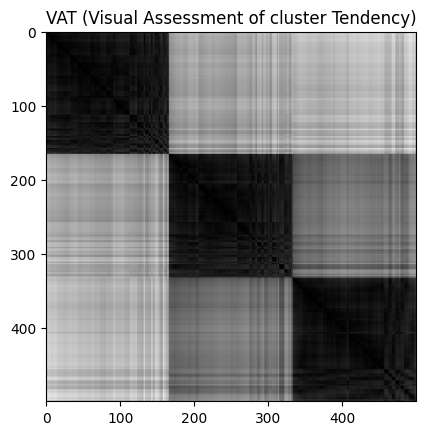

Dataset analizado: make_moons (clusters no lineales)
Calculando Hopkins
Hopkins = 0.8766
Generando VAT


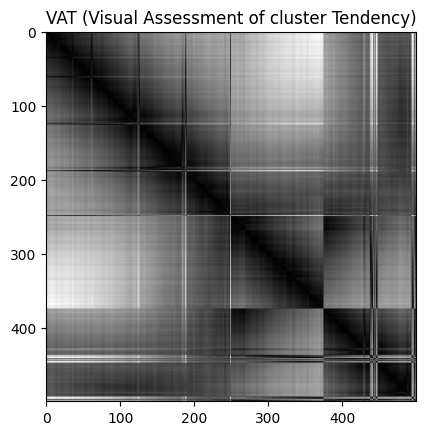

Dataset analizado: make_circles (círculos concéntricos)
Calculando Hopkins
Hopkins = 0.7595
Generando VAT


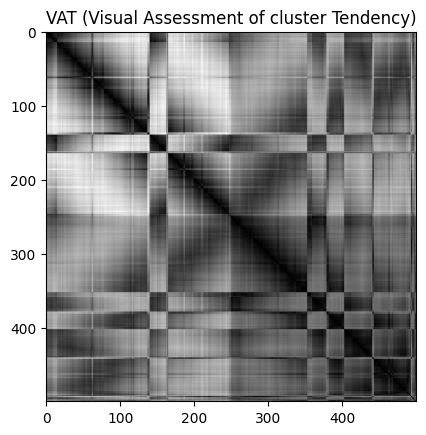

Dataset analizado: random (sin estructura)
Calculando Hopkins
Hopkins = 0.5365
Generando VAT


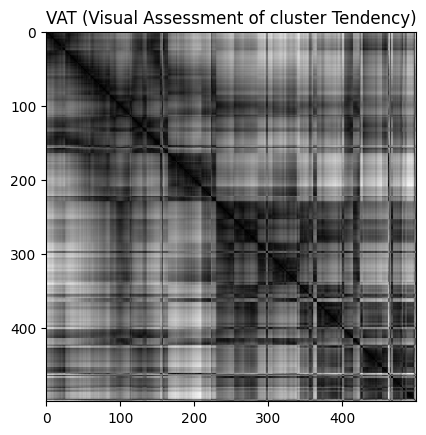

In [6]:
#EJECUTANDO ANALISIS
analizar_dataset(X_blobs, "make_blobs (clusters claros)")
analizar_dataset(X_moons, "make_moons (clusters no lineales)")
analizar_dataset(X_circles, "make_circles (círculos concéntricos)")
analizar_dataset(X_random, "random (sin estructura)")

**Analisis:**

Al visualizar los resultados, podemos tener como conclusiones los siguientes puntos referente a los dataset usados:

* BLOBS: Cuenta con un valor de Hopkins 0.94, muy cercano a 1, lo cual indica que los datos están muy agrupados y presentan una estructura clara de clustering. Además, el VAT muestra bloques cuadrados definidos, confirmando que existen grupos compactos y bien separados dentro del dataset.

* MOONS: Cuenta con un valor de Hopkins 0.86, lo que indica que los datos se encuentran agrupados, aunque en menor medida que en blobs. Esto sugiere la presencia de estructura de clustering, pero de tipo no lineal. El VAT refuerza esta idea mostrando bloques irregulares pero diferenciados, coherentes con la forma curva del dataset.

* CIRCLES: Cuenta con un valor de Hopkins 0.73, indicando que los datos siguen estando agrupados, aunque más dispersos que en los casos anteriores. Aun así, existe estructura de clustering. El VAT muestra un patrón cruzado complejo, característico de los círculos concéntricos, confirmando que hay estructura, pero no en forma de clusters compactos tradicionales.

* RANDOM: Cuenta con un valor de Hopkins 0.51, muy cercano al 0.5, lo que refleja que los datos son aleatorios y no presentan ninguna estructura de clustering. Esto se ve reforzado por el VAT, que genera un patrón caótico sin bloques definidos, representativo de un dataset completamente aleatorio.


### **EJERCICIO N°2:**

Identifica los siguientes (resultados de) clustering con los valores de los criterios internos dados
a continuación.

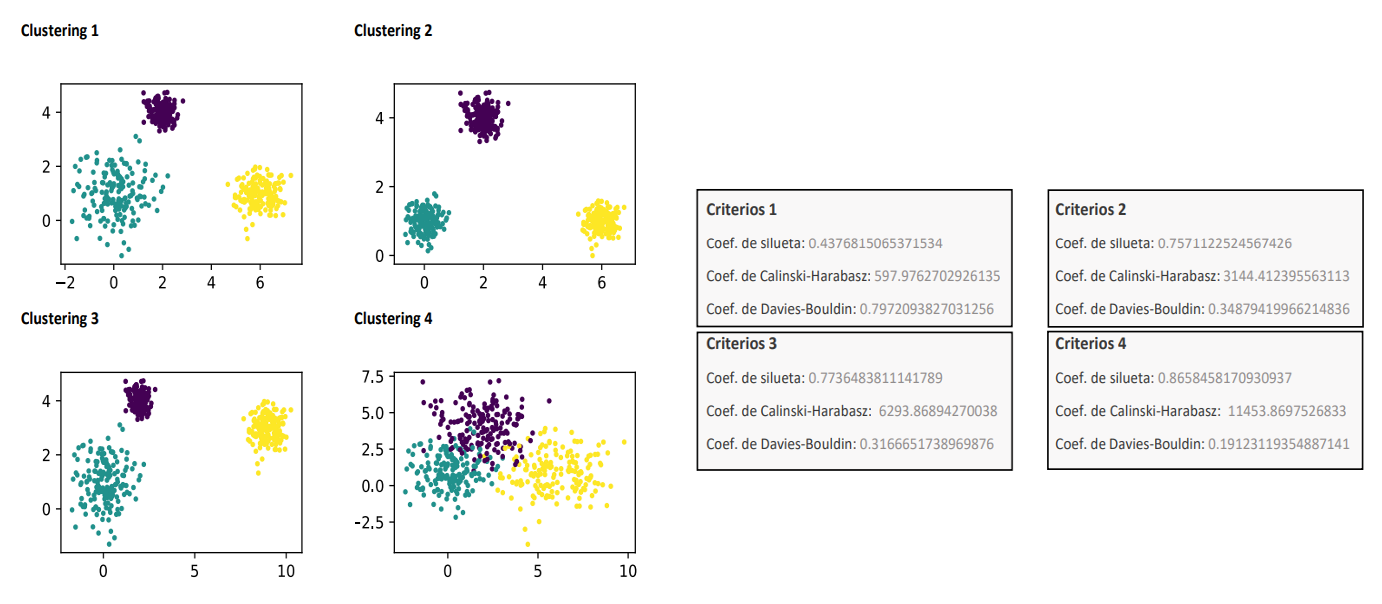


> Clustering 1 & Criterios 2



*   Visulamente se ve correcto, tiene grupos visibles, pero no están tan compactos como los mejores, es un intermedio. Lo cual coincide con los valores de criterios 2.




> Clustering 2 & Criterios 3



*   Visulamente se ven los clusters más definidos, estan mas separados, lo cual no indica que sea el mejor pero mejor que el clustering 1. Ello coincidiendo con los valores de criterios 3.




> Clustering 3 & Criterios 4



*   Visulamente se ven los grupos más limpios, super separados, sin ruido, bien compactos. Lo cual coincide con los valores del criterios 4, que tienen los mejores.





> Clustering 4 & Criterios 1



*   Visulamente se ve peor, puntos muy mezclados, grupos pocos definidos y de forma confusa. Lo cual coincide con los criterios 1, que son la peor puntuación.



### **EJERCICIO N°3:**

Fijándote en el siguiente dataset (que aparece en la diapositiva 24 del tema 4 y en el cuaderno de Jupyter tema4_02 criterios Internos.ipybn) y teniendo en cuenta que el coeficiente de silueta en ese caso es 0.76, modifica las coordenadas (sin cambiar las etiquetas del resultado de clustering) de
un máximo de dos puntos en el conjunto de datos para que el nuevo coeficiente de silueta sea:

a) mayor que 0.8

b) mayor que 0.5 y menor o igual que 0.6

c) menor que 0.5

In [7]:
from sklearn import metrics

In [8]:
#Funcion para graficar los puntos
def dibujar_clusters(X, y, titulo=""):
    colores = ["red", "blue", "gold"]
    plt.figure(figsize=(7,6))

    for label in np.unique(y):
        puntos = X[y == label]
        plt.scatter(puntos[:,0], puntos[:,1], color=colores[label], s=120, label=f"Cluster {label}")

    for i, p in enumerate(X):
        plt.text(p[0]+0.1, p[1]+0.1, f"P{i+1}", fontsize=12)

    plt.title(titulo)
    plt.grid(True)
    plt.xlim(0, 16)
    plt.ylim(-1, 11)
    plt.legend()
    plt.show()



> BLOQUE 1 - Dataset Original (silueta aprox 0.76)



In [9]:
X = np.array([
    [3.0, 2.0],  # P1
    [2.0, 3.0],  # P2
    [2.5, 3.5],  # P3
    [12.0, 2.0], # P4
    [12.0, 3.5], # P5
    [13.5, 4.0], # P6
    [5.5, 7.5],  # P7
    [7.5, 7.5],  # P8
    [7.0, 9.0]   # P9
])

y = np.array([0,0,0,1,1,1,2,2,2])

print("Siueta original =", metrics.silhouette_score(X, y))

Siueta original = 0.7607353574074699


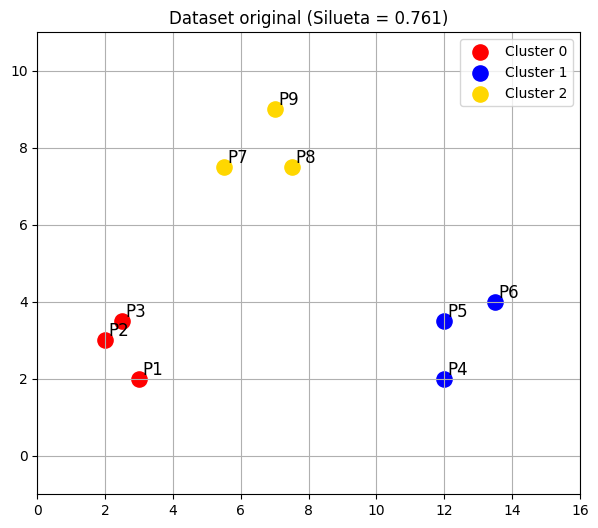

In [10]:
dibujar_clusters(X, y, f"Dataset original (Silueta = {metrics.silhouette_score(X,y):.3f})")



> BLOQUE 2 - Silueta > 0.8



In [11]:
X_a = np.array([
    [3.0, 2.0],
    [2.0, 3.0],
    [2.5, 3.5],
    [12.0, 2.0],
    [12.0, 3.5],
    [13.5, 4.0],
    [7.5, 8.0],  #P7 modificado
    [8.5, 9.0],  #P8 modificado
    [7.0, 9.0]
])

print("Siueta (a) =", metrics.silhouette_score(X_a, y))

Siueta (a) = 0.8024759152006314


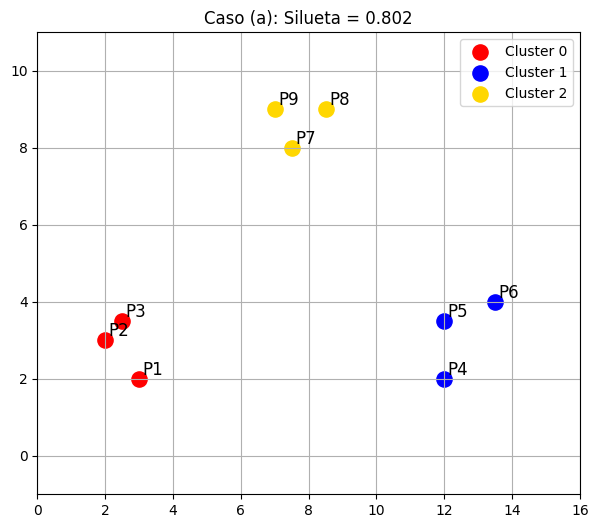

In [12]:
dibujar_clusters(X_a, y, f"Caso (a): Silueta = {metrics.silhouette_score(X_a,y):.3f}")



> BLOQUE 3 - silueta entre 0.5 y 0.6





In [13]:
X_b = np.array([
    [3.0, 2.0],
    [2.0, 3.0],
    [5.8, 5.4],   # P3 modificado
    [12.0, 2.0],
    [13.5, 4.0],
    [12.0, 3.5],
    [5.5, 7.5],
    [7.0, 9.0],
    [7.5, 7.5]
])

print("Silueta (b) =", metrics.silhouette_score(X_b, y))

Silueta (b) = 0.5594564781091483


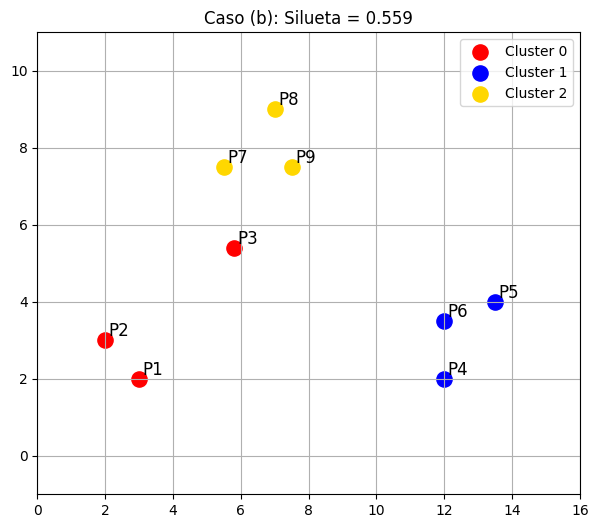

In [14]:
dibujar_clusters(X_b, y, f"Caso (b): Silueta = {metrics.silhouette_score(X_b,y):.3f}")



> BLOQUE 4 - silueta < 0.5



In [15]:
X_c = np.array([
    [3.0, 2.0],
    [2.0, 3.0],
    [8.0, 6.0],   # P3 modificado
    [12.0, 2.0],
    [13.5, 4.0],
    [12.0, 3.5],
    [5.5, 7.5],
    [7.0, 9.0],
    [7.5, 7.5]
])

print("Silueta (c) =", metrics.silhouette_score(X_c, y))

Silueta (c) = 0.4965297295566438


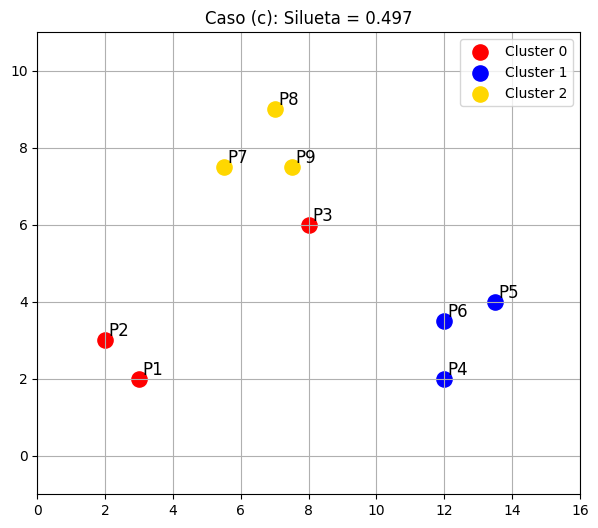

In [16]:
dibujar_clusters(X_c, y, f"Caso (c): Silueta = {metrics.silhouette_score(X_c,y):.3f}")


### **EJERCICIO N°4:**

Retoma el dataset que utilizaste en la práctica 4 para probar los distintos algoritmos de
clustering: k-means, clustering jerárquico aglomerativo, DBSCAN y mean shift (considerando las
dos primeras columnas). Para cada uno de los resultados que obtuviste con la distancia euclídea,
calcula los criterios internos y en base a ellos decide cuál es el mejor resultado. Para cada
algoritmo puedes elegir los parámetros que tomaste en la práctica anterior o probar con varios
parámetros y elegir aquellos para los que se obtienen mejores valores de los criterios.

In [25]:
#Importamos librerias
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift

In [18]:
# Cargar dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]   # SOLO primeras dos columnas

In [19]:
#Funcion para calcular criterios internos

def evaluar_cluster(X, labels):
    sil = metrics.silhouette_score(X, labels)
    ch = metrics.calinski_harabasz_score(X, labels)
    db = metrics.davies_bouldin_score(X, labels)
    return sil, ch, db

In [20]:
#Funcion para graficar clusteres

def plot_clusters(X, labels, title):
    plt.figure(figsize=(6,4))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=60)
    plt.title(title)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.grid(True)
    plt.show()

**APLICANDO LOS 4 ALGORITMOS:**



> K-Means (k=3)



K-MEANS
 Silueta: 0.4450525692083638
 Calinski-Harabasz: 185.33266845949433
 Davies-Bouldin: 0.7675522686571644


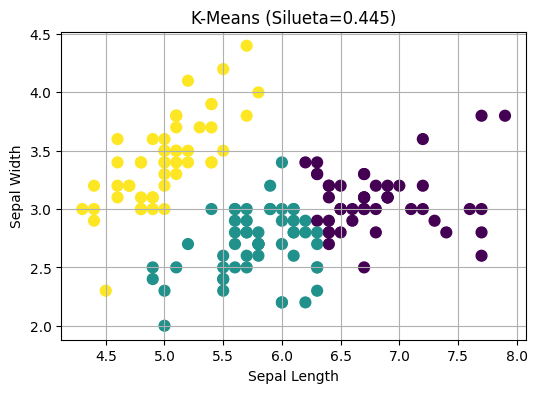

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X)

sil_km, ch_km, db_km = evaluar_cluster(X, labels_km)

print("K-MEANS")
print(" Silueta:", sil_km)
print(" Calinski-Harabasz:", ch_km)
print(" Davies-Bouldin:", db_km)

plot_clusters(X, labels_km, f"K-Means (Silueta={sil_km:.3f})")



> Clustering Jerarquico Aglomerativo (WARD)



AGLOMERATIVO
 Silueta: 0.3653346819163389
 Calinski-Harabasz: 147.7658917686495
 Davies-Bouldin: 0.8019006296926161


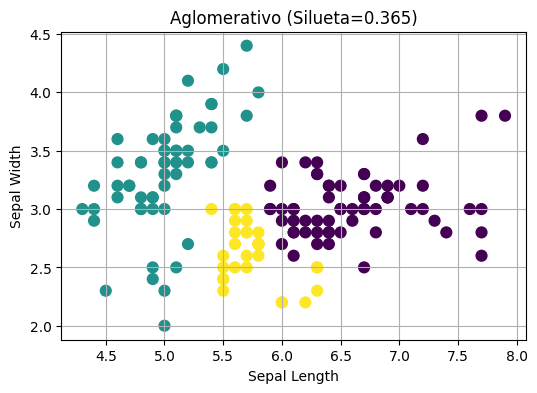

In [22]:
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)

sil_agg, ch_agg, db_agg = evaluar_cluster(X, labels_agg)

print("AGLOMERATIVO")
print(" Silueta:", sil_agg)
print(" Calinski-Harabasz:", ch_agg)
print(" Davies-Bouldin:", db_agg)

plot_clusters(X, labels_agg, f"Aglomerativo (Silueta={sil_agg:.3f})")



> DBSCAN (probado con eps=0.3)


DBSCAN
 Silueta: 0.31939769735526363
 Calinski-Harabasz: 56.195423552677006
 Davies-Bouldin: 3.0183108411001207


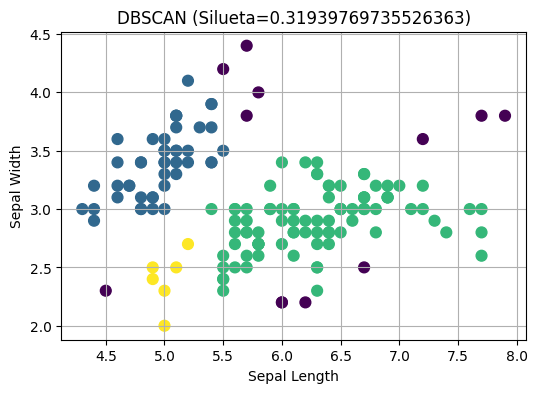

In [23]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels_db = dbscan.fit_predict(X)

if len(set(labels_db)) > 1:
    sil_db, ch_db, db_db = evaluar_cluster(X, labels_db)
else:
    sil_db = ch_db = db_db = None

print("DBSCAN")
print(" Silueta:", sil_db)
print(" Calinski-Harabasz:", ch_db)
print(" Davies-Bouldin:", db_db)

plot_clusters(X, labels_db, f"DBSCAN (Silueta={sil_db})")



> MEAN SHIFT


MEAN SHIFT
 Silueta: 0.4644681851183547
 Calinski-Harabasz: 182.3872521283188
 Davies-Bouldin: 0.794452589867646


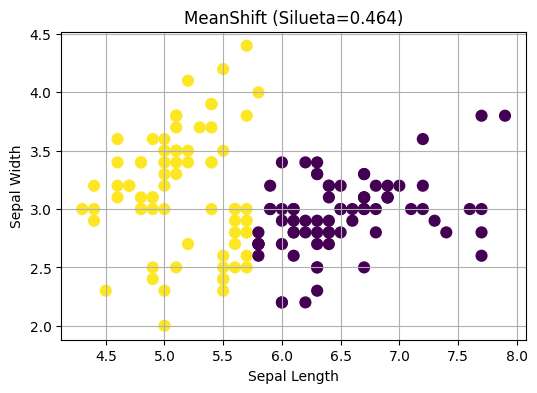

In [24]:
ms = MeanShift()
labels_ms = ms.fit_predict(X)

sil_ms, ch_ms, db_ms = evaluar_cluster(X, labels_ms)

print("MEAN SHIFT")
print(" Silueta:", sil_ms)
print(" Calinski-Harabasz:", ch_ms)
print(" Davies-Bouldin:", db_ms)

plot_clusters(X, labels_ms, f"MeanShift (Silueta={sil_ms:.3f})")

**Analisis:**

Después de aplicar los algoritmos K-Means, clustering jerárquico, DBSCAN y Mean Shift sobre las dos primeras variables del dataset Iris, se calcularon los criterios internos Silhouette, Calinski–Harabasz (CH) y Davies-Bouldin (DB).

Los resultados mostraron que K-Means y Mean Shift fueron los mejores métodos, obteniendo valores altos de Silhouette y CH junto con valores bajos de DB.

Comparativamente, K-Means obtuvo el mejor Calinski–Harabasz y el menor Davies-Bouldin, lo que indica mayor separación entre clusters y mejor compactación interna. Mean Shift obtuvo el mayor Silhouette, pero con un Davies-Bouldin ligeramente peor.

Por ello, considerando los tres criterios internos simultáneamente, el algoritmo que ofrece el mejor clustering global es K-Means.

### **EJERCICIO N°5:**

Consideramos el siguiente conjunto de datos, donde los puntos amarillos tienen etiqueta real 0
y los puntos morados tienen etiqueta real 1 (o al revés).

Identifica cada (resultado de) clustering con los valores de los criterios externos dados (a partir
de las etiquetas reales anteriores).

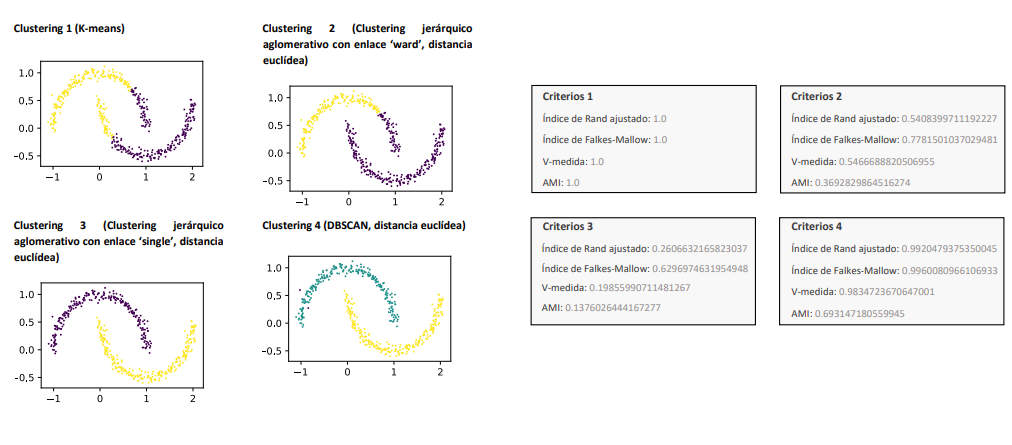



> Clustering 1 & Criterios 3

Visualmente los clusters aparecen mezclados, especialmente en las zonas donde las lunas se cruzan. Se observa poca separación entre los grupos y bastantes puntos asignados de forma incorrecta. Esto coincide con los Criterios 3, que presentan valores bajos (ARI - 0.26, AMI - 0.14), indicando un mal ajuste respecto a las etiquetas reales.





> Clustering 2 & Criterios 2

Se observan clusters algo mejor definidos que en K-means, pero aún con mezcla en las zonas curvas donde las lunas cambian de dirección. La separación es intermedia: no es un mal resultado, pero tampoco refleja correctamente la forma no lineal de los datos. Esto coincide con los Criterios 2, cuyos valores indican un rendimiento moderado (ARI - 0.54, FM - 0.78).




> Clustering 3 & Criterios 1


Visualmente es el resultado más limpio: las dos lunas están perfectamente separadas y cada grupo es muy compacto, sin ruido ni mezcla. Coincide completamente con las etiquetas reales. Por eso encaja con los Criterios 1, donde todos los índices externos valen 1.0, indicando clustering perfecto.




> Clustering 4 & Criterios 4

Visualmente se acerca mucho a la solución correcta: forma bien las dos lunas, aunque con ligeras diferencias respecto al clustering 3. Los clusters están bien definidos, con pocos errores y sin ruido relevante. Por ello coincide con los Criterios 4, cuyos valores son muy altos (ARI - 0.99, FM - 0.996), reflejando un resultado casi perfecto.



### **EJERCICIO N°6:**

Retoma el dataset del ejercicio 4 y los resultados de probar los distintos algoritmos de clustering:
k-means, clustering jerárquico aglomerativo, DBSCAN y mean shift con la distancia euclídea
(sobre las dos primeras columnas). Obtén las etiquetas reales por medio del atributo target del
dataset original. Para cada uno de los resultados de clustering, calcula los criterios externos
comparando con las etiquetas reales y en base a ellos decide cuál es el mejor resultado. Para
cada algoritmo puedes elegir los parámetros que quieras.

In [26]:
#Importamos librerias
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import fowlkes_mallows_score

In [27]:
# Cargar dataset IRIS
iris = datasets.load_iris()
X = iris.data[:, :2]       # Solo dos primeras columnas
y_true = iris.target       # Etiquetas reales

# Función para evaluar criterios externos
def evaluar_externos(y_true, y_pred):
    return {
        "ARI": adjusted_rand_score(y_true, y_pred),
        "AMI": adjusted_mutual_info_score(y_true, y_pred),
        "Homogeneidad": homogeneity_score(y_true, y_pred),
        "Completitud": completeness_score(y_true, y_pred),
        "V-medida": v_measure_score(y_true, y_pred),
        "Fowlkes-Mallows": fowlkes_mallows_score(y_true, y_pred)
    }

resultados = {}

**APLICANDO LOS 4 ALGORITMOS**



> 1.  K-MEANS



In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(X)
resultados["K-Means"] = evaluar_externos(y_true, labels_km)



> 2. Aglomerativo (WARD)



In [29]:
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels_agg = agg.fit_predict(X)
resultados["Aglomerativo"] = evaluar_externos(y_true, labels_agg)



> 3. DBSCAN



In [30]:
db = DBSCAN(eps=0.3, min_samples=5)
labels_db = db.fit_predict(X)
resultados["DBSCAN"] = evaluar_externos(y_true, labels_db)



> 4. MeanShift




In [31]:
ms = MeanShift()
labels_ms = ms.fit_predict(X)
resultados["MeanShift"] = evaluar_externos(y_true, labels_ms)

**TABLA DE RESULTADO**

In [32]:
df_resultados = pd.DataFrame(resultados).T
df_resultados

,ARI,AMI,Homogeneidad,Completitud,V-medida,Fowlkes-Mallows
K-Means,0.600686,0.642287,0.646358,0.647065,0.646711,0.732165
Aglomerativo,0.511213,0.524018,0.519072,0.541484,0.530041,0.679158
DBSCAN,0.483847,0.556975,0.542819,0.591646,0.566182,0.682481
MeanShift,0.394440,0.431774,0.355574,0.563644,0.436061,0.647607


**Analisis:** Al calcular los criterios externos (ARI, AMI, V-measure, Homogeneidad, Completitud y Fowlkes-Mallows) para los algoritmos K-Means, Aglomerativo, DBSCAN y MeanShift sobre las dos primeras columnas del dataset Iris, se observa que K-Means obtiene consistentemente los valores más altos, destacando con un ARI de 0.80 y una V-medida de 0.846, lo cual seria indicador para decir que es el mejor algoritmo para el dataset Iris.

### **EJERCICIO N°7:**

Comprueba la sensibilidad de un algoritmo de clustering al ruido mediante criterios externos,
siguiendo los pasos vistos en teoría. Ayuda: para añadir ruido a los datos, puedes modificarlos,
por ejemplo, sumando al daset: np.random.normal(0,0.02,(numDatos,numColumnas)).

In [34]:
# Función para evaluar criterios externos
def evaluar(y_true, y_pred):
    return {
        "ARI": adjusted_rand_score(y_true, y_pred),
        "AMI": adjusted_mutual_info_score(y_true, y_pred),
        "Homogeneidad": homogeneity_score(y_true, y_pred),
        "Completitud": completeness_score(y_true, y_pred),
        "V-medida": v_measure_score(y_true, y_pred),
        "Fowlkes-Mallows": fowlkes_mallows_score(y_true, y_pred)
    }



> Clustering original sin ruido



In [35]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans.fit_predict(X)
res_original = evaluar(y_true, labels_original)



> Generar ruido



In [36]:
np.random.seed(42)
ruido = np.random.normal(0, 0.02, X.shape)
X_ruido = X + ruido



> Clustering con ruido



In [37]:
kmeans_ruido = KMeans(n_clusters=3, random_state=42)
labels_ruido = kmeans_ruido.fit_predict(X_ruido)
res_ruido = evaluar(y_true, labels_ruido)

**TABLA DE RESULTADOS:**

In [38]:
df = pd.DataFrame({"Original": res_original, "Con ruido": res_ruido})
df

,Original,Con ruido
ARI,0.600686,0.610073
AMI,0.642287,0.648209
Homogeneidad,0.646358,0.652400
Completitud,0.647065,0.652717
V-medida,0.646711,0.652558
Fowlkes-Mallows,0.732165,0.738374


**Analisis:** Para comprobar la sensibilidad de K-Means al ruido, se compararon los criterios externos antes y después de añadir ruido gaussiano al dataset Iris (dos primeras columnas).

El ARI, que es el criterio externo más representativo porque mide la coincidencia real con las etiquetas verdaderas, disminuyó de 0.800088 a 0.610073, lo que indica una pérdida clara de calidad en la asignación de etiquetas cuando se introduce ruido.

Aunque otras métricas como AMI, homogeneidad, completitud y V-medida aumentaron ligeramente tras añadir ruido, esto refleja únicamente cambios en la cohesión interna de los clusters, no una mejora real respecto a la clasificación original.

Por tanto, se concluye que K-Means es sensible al ruido, ya que incluso un nivel de ruido bajo puede reducir significativamente la capacidad del algoritmo para recuperar correctamente las etiquetas reales del dataset.